In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('SOCR-HeightWeight.csv')
df.drop('Index', axis=1, inplace=True) # remove the extra column from datafram
df.rename(columns={'Height(Inches)': 'Height', 'Weight(Pounds)': 'Weight'}, inplace=True)
df = df[:30]   # rows 0 to 29
print(len(df))
df


30


,Height,Weight
0,65.78331,112.99250
1,71.51521,136.48730
2,69.39874,153.02690
3,68.21660,142.33540
4,67.78781,144.29710
5,68.69784,123.30240
6,69.80204,141.49470
7,70.01472,136.46230
8,67.90265,112.37230
9,66.78236,120.66720


**seaborn vs scatterplot:**
Seaborn and Matplotlib are both Python libraries used for data visualization, but they serve slightly different purposes and offer distinct features:

| Aspect                | Matplotlib                                         | Seaborn                                         |
|-----------------------|---------------------------------------------------|------------------------------------------------|
| Level                 | Low-level plotting library                          | High-level interface built on top of Matplotlib|
| Ease of Use           | More verbose and requires manual specification     | Simplifies complex visualizations with fewer lines of code |
| Default Aesthetics    | Basic default styles, requires manual styling      | Beautiful default themes and color palettes    |
| Types of Plots        | Wide variety of basic graphical plots like line, scatter, bar, histograms | Advanced statistical plots like violin, heatmaps, pairplots |
| Integration           | Works well with NumPy arrays                        | Designed to work seamlessly with Pandas DataFrames |
| Customization         | Highly customizable, granular control               | Less customization but easier to use for standard statistical plots |
| Use Case              | When full control and detailed customization are needed | When quick, attractive, and statistical visualizations are desired |

### Summary  
- Matplotlib is the foundational, versatile library giving you complete control but with more complexity.
- Seaborn builds on Matplotlib by offering simpler syntax and attractive default aesthetics, especially for statistical data visualization.

Choose Matplotlib for fine control and detailed plot customization, and choose Seaborn for fast, beautiful, and statistically informative plots with less effort.

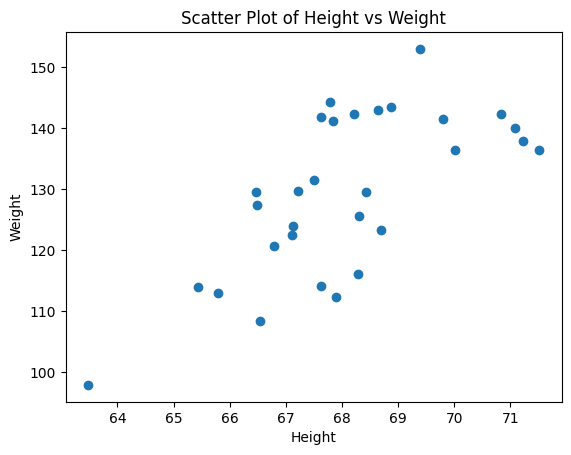

In [53]:
# scatter plot
plt.scatter(data=df, x='Height', y='Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot of Height vs Weight')
plt.show()


In [54]:
## correlation
df.corr()

,Height,Weight
Height,1.000000,0.686032
Weight,0.686032,1.000000


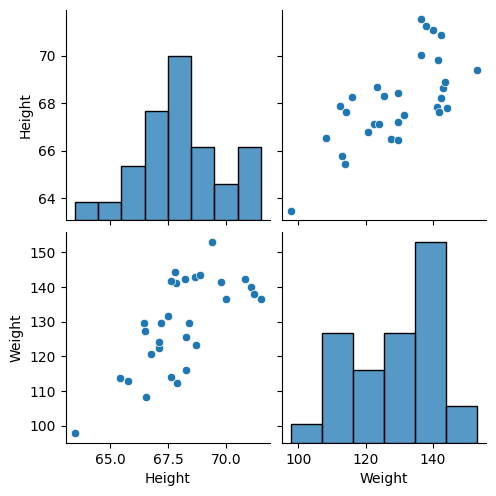

In [55]:
## seaborn
sns.pairplot(df)

In [56]:
X = df[['Weight']] # Independent variable: This should be a dataframe or 2D arary
y = df['Height'] # dependent variable: this should be a series or 1D array


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
# Inbuilt method - standardization
scaler = StandardScaler()
# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X.head()

,Weight
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [82]:
X_train_scaled
X_train_scaled.shape

(21, 1)

In [83]:
X_test_scaled
X_test_scaled.shape

(9, 1)

In [85]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train_scaled, y_train)



LinearRegression(n_jobs=-1)

In [86]:
regression.coef_

array([1.40659971])

In [87]:
regression.intercept_


np.float64(68.05865476190475)

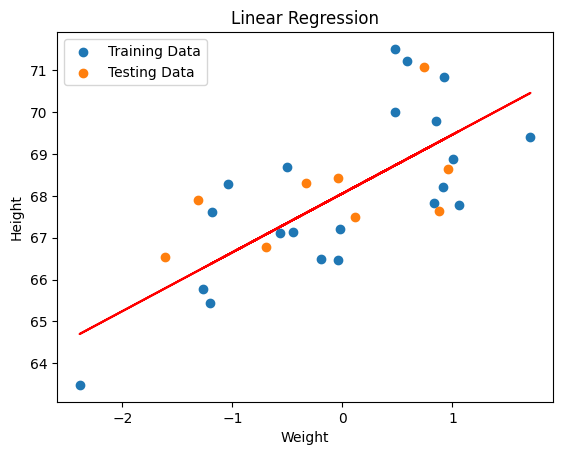

In [92]:
plt.scatter(X_train_scaled, y_train, label='Training Data')
plt.scatter(X_test_scaled, y_test, label='Testing Data')
# plt.plot(X_train_scaled, y_train, color='green') # it gives the curve connecting each datapoints
plt.plot(X_train_scaled, regression.predict(X_train_scaled), color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Linear Regression')
plt.legend()
plt.show()